<a href="https://colab.research.google.com/github/TatyanaLanceva/Profile/blob/main/Wildberries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отчет ДДС


In [7]:
import pandas as pd # Генерируем данные для заполнения формы отчета WB для ДДС
                    # По форме финансового отчета заполняем 50000 строк
import random

# Параметры для генерации случайных значений
num_rows = 50000  # Количество строк
min_date = '2021-01-01'  # Начальная дата
max_date = '2024-12-31'  # Конечная дата

def generate_random_date(start, end):
    """Генерация случайной даты"""
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    time_delta = end_date - start_date
    int_delta = time_delta.days
    random_days = random.randrange(int_delta)
    return (start_date + pd.Timedelta(days=random_days)).strftime('%Y-%m-%d')

def generate_sales():
    """Генерация случайных сумм продаж"""
    return round(random.uniform(1000, 15000), 2)

def generate_commission(sales):
    """Расчёт комиссии (5% от продаж)"""
    return round(sales * 0.05, 2)

def generate_returns():
    """Генерация случайных возвратов"""
    return round(random.uniform(0, 500), 2)

def generate_taxes(sales):
    """Расчёт налогов (15% от продаж)"""
    return round(sales * 0.15, 2)

# Генерация основных полей
data = {
    'Дата': [generate_random_date(min_date, max_date) for _ in range(num_rows)],
    'Продажи': [generate_sales() for _ in range(num_rows)]
}

# Добавление остальных полей после инициализации основного словаря
for i in range(num_rows):
    data.setdefault('Комиссия WB', []).append(generate_commission(data['Продажи'][i]))
    data.setdefault('Возвраты', []).append(generate_returns())
    data.setdefault('Налоги', []).append(generate_taxes(data['Продажи'][i]))

# Создание DataFrame
df = pd.DataFrame(data)

# Добавляем столбец чистого дохода
df['Чистый доход'] = df['Продажи'] - df['Комиссия WB'] - df['Возвраты'] - df['Налоги']

# Сортировка по дате
df.sort_values(by='Дата', inplace=True)

# Сохранение файла в формате CSV
df.to_csv('dds_report.csv', index=False)

In [8]:
df  # Выводим полученные данные - аналог выгрузки из личного кабинета WB
df.head()


,Дата,Продажи,Комиссия WB,Возвраты,Налоги,Чистый доход
48995,2021-01-01,7855.15,392.76,95.68,1178.27,6188.44
47786,2021-01-01,1021.65,51.08,196.14,153.25,621.18
19539,2021-01-01,5801.09,290.05,315.09,870.16,4325.79
9143,2021-01-01,2387.31,119.37,22.05,358.10,1887.79
46898,2021-01-01,13966.30,698.32,381.19,2094.94,10791.85


In [9]:
import pandas as pd

# Загружаем данные из CSV-файла
df = pd.read_csv('/content/dds_report.csv', sep=',', encoding='utf-8')

# Преобразуем строку 'Дата' в объект datetime формата 'год-месяц-день'
df['Дата'] = pd.to_datetime(df['Дата'])

# Группируем данные по году и месяцу
grouped_df = df.groupby([df['Дата'].dt.year, df['Дата'].dt.month])[
    ['Продажи', 'Комиссия WB', 'Возвраты', 'Налоги', 'Чистый доход']
].sum()

# Переформатируем индекс для удобочитаемости
grouped_df.index.names = ['Год', 'Месяц']
grouped_df.reset_index(inplace=True)

# Добавляем новый столбец 'Чистая прибыль'
grouped_df['Чистая прибыль'] = (
    grouped_df['Продажи'] -
    grouped_df['Комиссия WB'] -
    grouped_df['Возвраты'] -
    grouped_df['Налоги']
)

# Сортируем по году и месяцу
grouped_df.sort_values(['Год', 'Месяц'], ascending=[True, True], inplace=True)

# Экспортируем результаты в новый CSV-файл
grouped_df.to_csv('dds_report_monthly.csv', index=False)

print("Готовый отчет сохранен в файле dds_report_monthly.csv")
print()
print('Отчет ДДС')
grouped_df

Готовый отчет сохранен в файле dds_report_monthly.csv

Отчет ДДС


,Год,Месяц,Продажи,Комиссия WB,Возвраты,Налоги,Чистый доход,Чистая прибыль
0,2021,1,8630654.97,431532.79,268167.46,1294598.05,6636356.67,6636356.67
1,2021,2,7184474.88,359223.82,241388.04,1077671.19,5506191.83,5506191.83
2,2021,3,8696818.17,434840.99,267763.31,1304522.71,6689691.16,6689691.16
3,2021,4,8382654.84,419132.70,275435.44,1257398.04,6430688.66,6430688.66
4,2021,5,8831725.09,441586.31,270305.73,1324758.59,6795074.46,6795074.46
5,2021,6,7882283.57,394114.32,252241.87,1182342.46,6053584.92,6053584.92
6,2021,7,8260596.98,413030.20,258848.61,1239089.44,6349628.73,6349628.73
7,2021,8,8702104.79,435105.50,269100.65,1305315.50,6692583.14,6692583.14
8,2021,9,8113191.31,405659.87,248624.95,1216978.59,6241927.90,6241927.90
9,2021,10,8244769.41,412238.61,252807.42,1236715.35,6343008.03,6343008.03


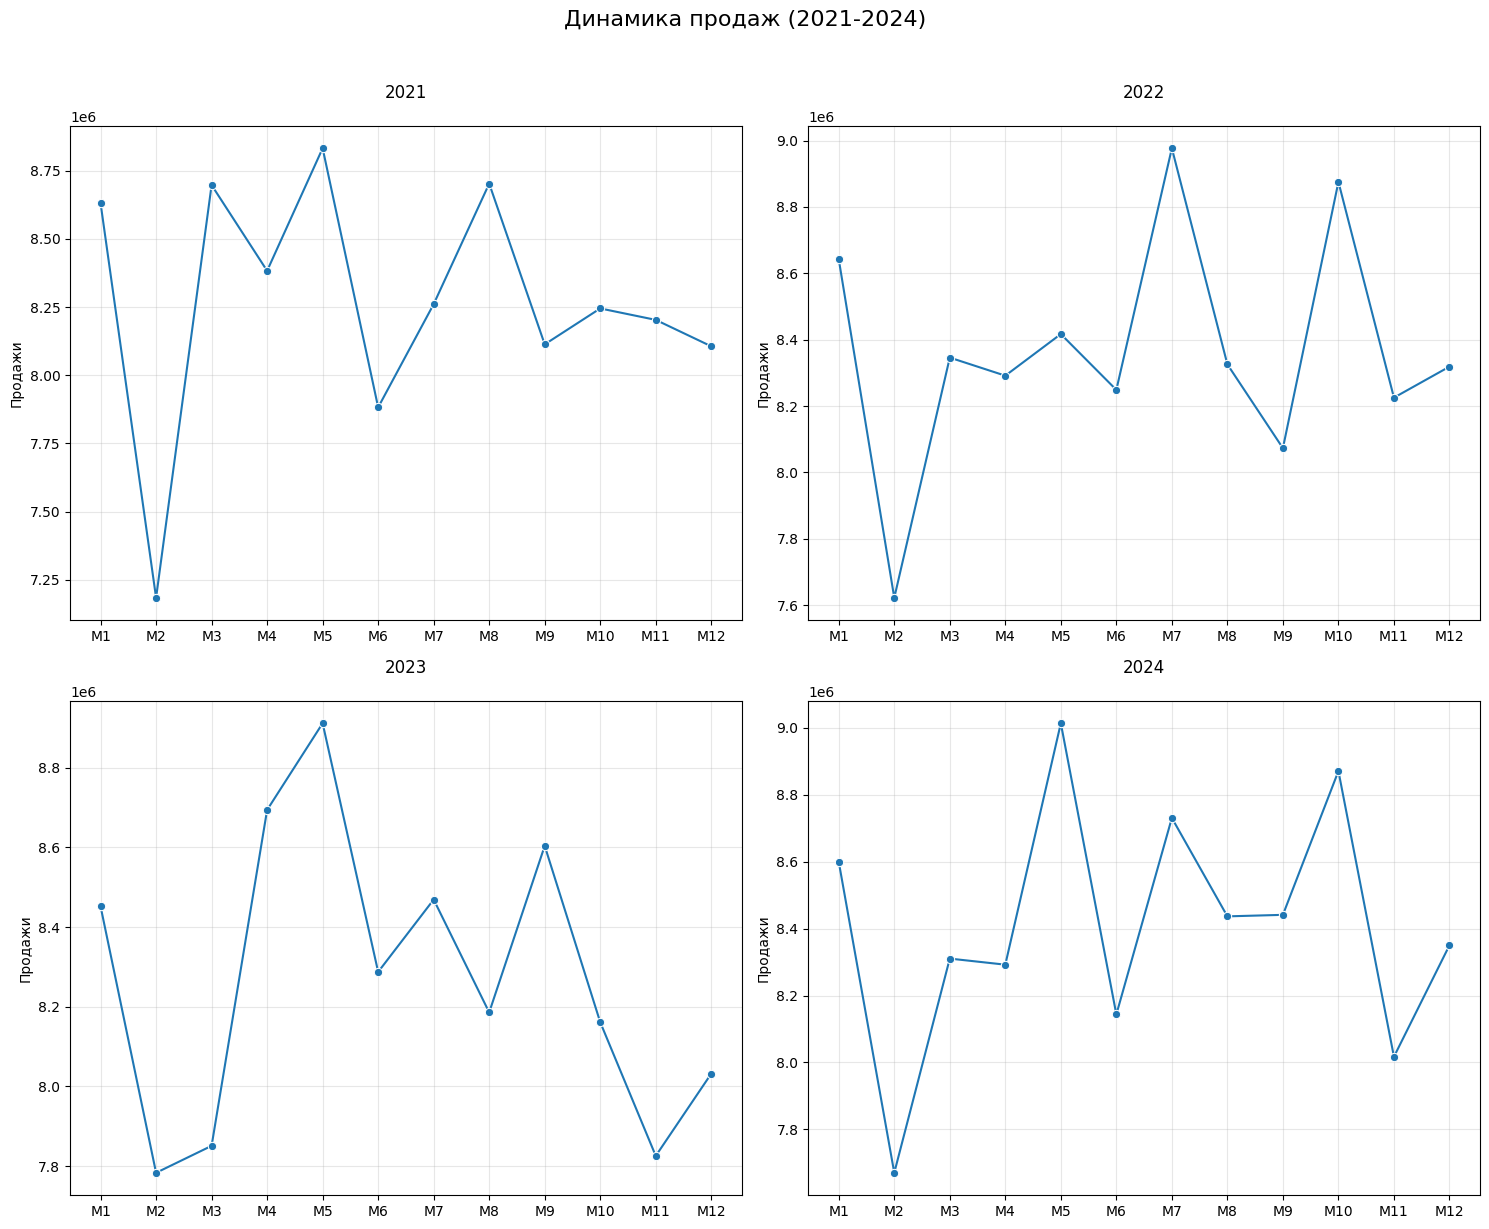

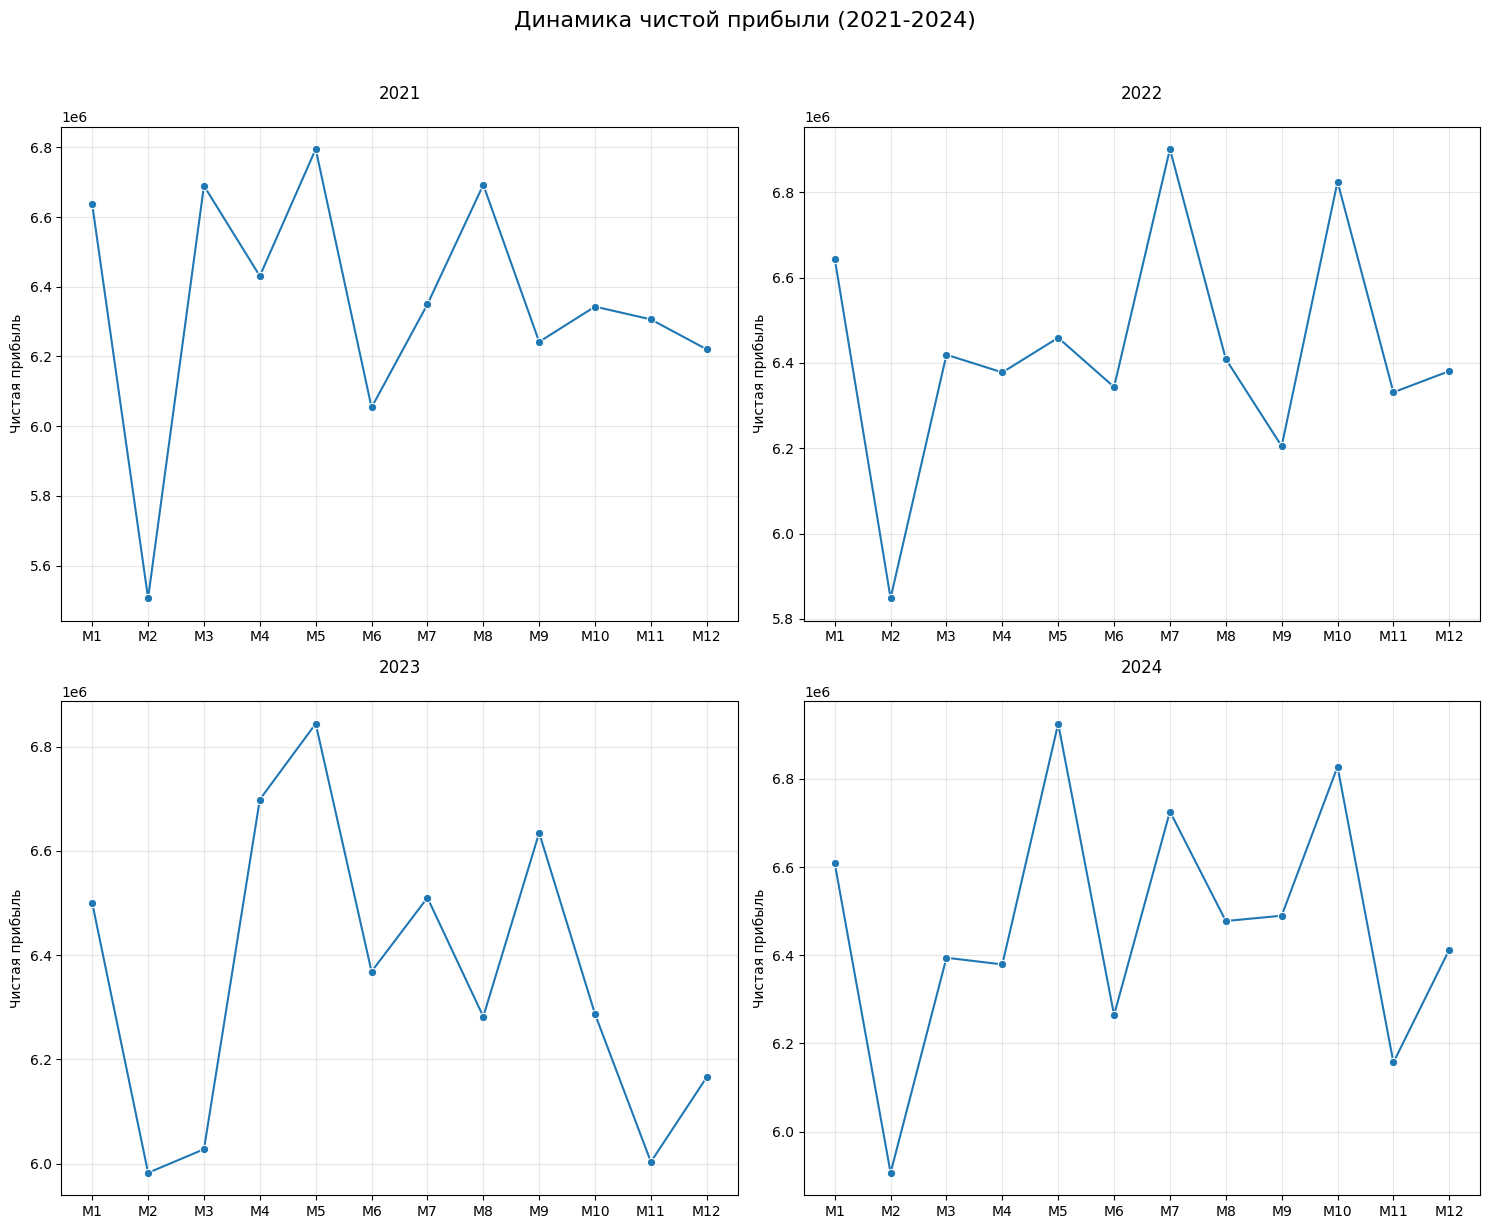

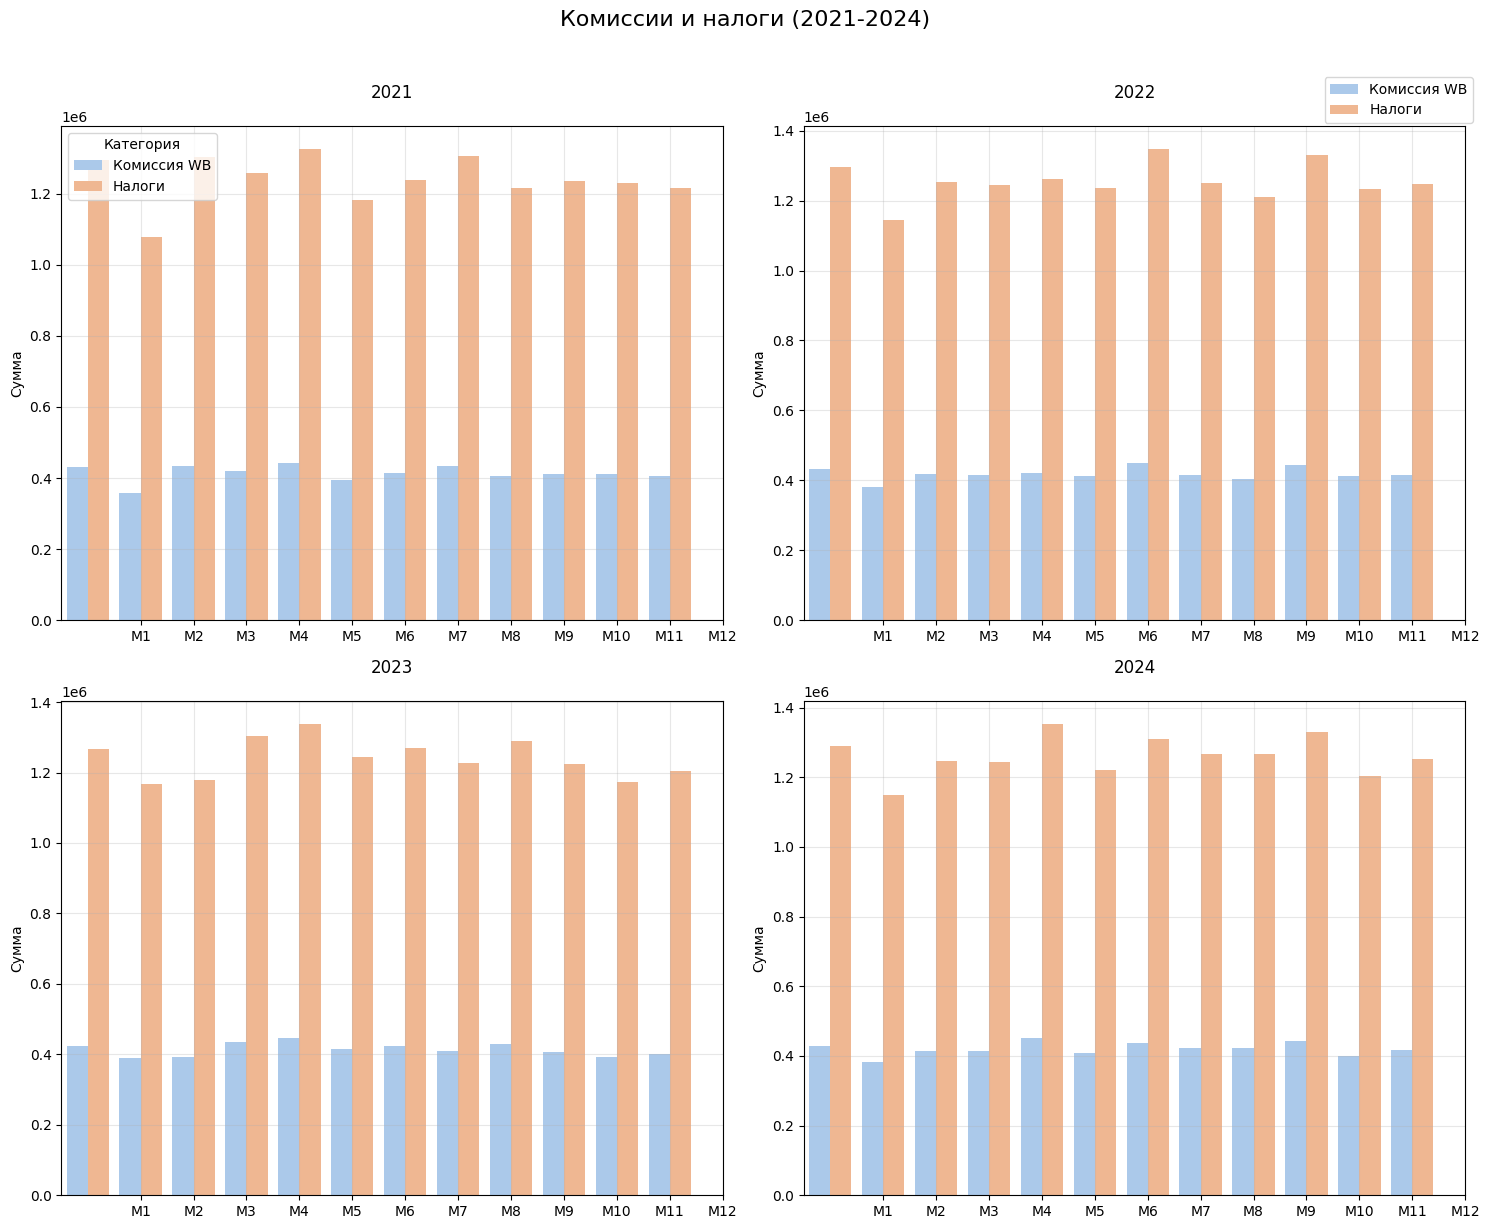

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Подгружаем данные
df = pd.read_csv('/content/dds_report_monthly.csv', sep=',', encoding='utf-8')

# Создаем столбец 'Дата' и сортируем
df['Дата'] = pd.to_datetime(df['Год'].astype(str) + '-' + df['Месяц'].astype(str) + '-01')
df = df.sort_values('Дата')

# Функция для создания групповых графиков
def create_grouped_plots(data, y_var, title, palette='tab10', plot_type='line'):
    years = sorted(data['Год'].unique())

    # Разбиваем годы на группы по 4
    year_groups = [years[i:i+4] for i in range(0, len(years), 4)]

    for group in year_groups:
        n_years = len(group)
        n_cols = 2
        n_rows = math.ceil(n_years / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
        fig.suptitle(f'{title} ({min(group)}-{max(group)})', fontsize=16, y=1.02)

        axes = axes.flatten() if n_rows > 1 else [axes]

        for idx, year in enumerate(group):
            ax = axes[idx]
            year_data = data[data['Год'] == year]

            if plot_type == 'line':
                sns.lineplot(
                    data=year_data,
                    x='Месяц',
                    y=y_var,
                    ax=ax,
                    marker='o',
                    color=sns.color_palette(palette)[0]
                )
                # Устанавливаем фиксированные тики и их метки
                ax.set_xticks(range(1, 13))  # Устанавливаем позиции тиков
                ax.set_xticklabels([f'M{m}' for m in range(1, 13)])  # Устанавливаем метки

            elif plot_type == 'comparison':
                melted = year_data.melt(
                    id_vars=['Месяц'],
                    value_vars=['Комиссия WB', 'Налоги'],
                    var_name='Категория',
                    value_name='Сумма'
                )
                sns.barplot(
                    data=melted,
                    x='Месяц',
                    y='Сумма',
                    hue='Категория',
                    ax=ax,
                    palette='pastel'
                )
                # Устанавливаем фиксированные тики и их метки
                ax.set_xticks(range(1, 13))  # Устанавливаем позиции тиков
                ax.set_xticklabels([f'M{m}' for m in range(1, 13)])  # Устанавливаем метки
                ax.legend().set_visible(False) if idx > 0 else None

            ax.set_title(f'{year}', pad=20)
            ax.set_xlabel('')
            ax.grid(alpha=0.3)

        # Скрываем пустые субплоты
        for j in range(n_years, n_rows*n_cols):
            axes[j].set_visible(False)

        handles, labels = ax.get_legend_handles_labels()
        if plot_type == 'comparison' and len(handles) > 0:
            fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.99, 0.97))

        plt.tight_layout()
        plt.savefig(f'{title}_{min(group)}-{max(group)}.png', dpi=300, bbox_inches='tight')
        plt.show()

# 1. Графики продаж по годам (группами по 4 года)
create_grouped_plots(
    data=df,
    y_var='Продажи',
    title='Динамика продаж',
    plot_type='line'
)

# 2. Графики чистой прибыли по годам
create_grouped_plots(
    data=df,
    y_var='Чистая прибыль',
    title='Динамика чистой прибыли',
    plot_type='line'
)

# 3. Сравнение комиссий и налогов
create_grouped_plots(
    data=df,
    y_var='',
    title='Комиссии и налоги',
    plot_type='comparison'
)

# PnL

In [12]:
import random
from openpyxl import Workbook

def generate_random_data(n_rows):
    data = {
        'Продукт': [f'Product {i}' for i in range(1, n_rows + 1)],
        'Цена': [random.randint(1000, 20000) for _ in range(n_rows)],
        'Количество': [random.randint(1, 50) for _ in range(n_rows)]
    }
    return pd.DataFrame(data)

def write_to_excel(df, filename):
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)

def format_currency(x):
    """Форматирует число в удобочитаемый вид."""
    if isinstance(x, (int, float)):
        return f"{x:,.2f}"  # Форматируем число с разделителем тысяч и двумя знаками после запятой
    else:
        return x

def calculate_extended_pnl(sales_df, returns_df, financial_df, logistics_df):
    # Выручка от продаж
    revenue = sales_df['Цена'].sum() * sales_df['Количество'].sum()

    # Себестоимость проданных товаров (COGS)
    cogs = returns_df['Цена'].sum() * returns_df['Количество'].sum()

    # Валовая прибыль
    gross_profit = revenue - cogs

    # Операционные расходы
    ga_expenses = financial_df['Цена'].sum() / 4  # Допустим, GA составляет 25% от общих финансовых затрат
    sga_expenses = financial_df['Цена'].sum() / 8  # SG&A составляет 12.5%
    depreciation_and_amortization = financial_df['Цена'].sum() / 10  # Амортизация и износ составляют 10%
    other_operating_expenses = financial_df['Цена'].sum() / 20  # Прочие операционные расходы составляют 5%

    total_operating_expenses = ga_expenses + sga_expenses + depreciation_and_amortization + other_operating_expenses

    # EBITDA (операционная прибыль до амортизации, процентов и налогов)
    ebitda = gross_profit - total_operating_expenses

    # Проценты по кредитам и займам
    interest_expense = financial_df['Цена'].sum() / 15  # Допустим, процентные расходы составляют около 6.67%

    # Налоги
    taxes = financial_df['Цена'].sum() / 30  # Допустим, налоговое обязательство составляет около 3.33%

    # Чистая прибыль
    net_income = ebitda - interest_expense - taxes

    extended_pnl_report = {
        'Выручка от продаж': revenue,
        'Себестоимость проданных товаров (COGS)': cogs,
        'Валовая прибыль': gross_profit,
        'Общие административные расходы (GA)': ga_expenses,
        'Коммерческие, общие и административные расходы (SG&A)': sga_expenses,
        'Амортизация и износ': depreciation_and_amortization,
        'Прочие операционные расходы': other_operating_expenses,
        'Итого операционные расходы': total_operating_expenses,
        'EBITDA': ebitda,
        'Процентные расходы': interest_expense,
        'Налоги': taxes,
        'Чистая прибыль': net_income
    }

    # Применяем форматирование чисел
    formatted_report = {k: format_currency(v) for k, v in extended_pnl_report.items()}

    return pd.DataFrame(formatted_report, index=[0])

if __name__ == "__main__":
    df_sales = generate_random_data(50000)
    write_to_excel(df_sales, 'sales_report.xlsx')

    df_returns = generate_random_data(50000)
    write_to_excel(df_returns, 'returns_report.xlsx')

    df_financial = generate_random_data(50000)
    write_to_excel(df_financial, 'financial_report.xlsx')

    df_logistics = generate_random_data(50000)
    write_to_excel(df_logistics, 'logistics_report.xlsx')

    extended_pnl_df = calculate_extended_pnl(df_sales, df_returns, df_financial, df_logistics)
    write_to_excel(extended_pnl_df, 'extended_pnl_report.xlsx')

In [13]:
extended_pnl_df # Вывод  PnL по нашим данным итоговые данные

,Выручка от продаж,Себестоимость проданных товаров (COGS),Валовая прибыль,Общие административные расходы (GA),"Коммерческие, общие и административные расходы (SG&A)",Амортизация и износ,Прочие операционные расходы,Итого операционные расходы,EBITDA,Процентные расходы,Налоги,Чистая прибыль
0,672719750656375,669945868752972,2773881903403,"130,863,585.25","65,431,792.62","52,345,434.10","26,172,717.05","274,813,529.02","2,773,607,089,873.98","34,896,956.07","17,448,478.03","2,773,554,744,439.88"


In [16]:
import random
import datetime
from openpyxl import Workbook
import pandas as pd

# Генерация случайных данных с добавлением временных меток
def generate_random_data_with_dates(n_rows, start_date=None):
    if not start_date:
        start_date = datetime.datetime.now().replace(day=1)  # Начало текущего месяца

    dates = []
    for i in range(n_rows):
        date = start_date + datetime.timedelta(days=i)
        dates.append(date)

    data = {
        'Дата': dates,
        'Продукт': [f'Product {i}' for i in range(1, n_rows + 1)],
        'Цена': [random.randint(1000, 20000) for _ in range(n_rows)],
        'Количество': [random.randint(1, 50) for _ in range(n_rows)]
    }
    return pd.DataFrame(data)

# Функция для сохранения DataFrame в Excel
def write_to_excel(df, filename):
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)

# Функция для форматирования валюты
def format_currency(x):
    if isinstance(x, (int, float)):
        return f"{x:,.2f}"
    else:
        return x

# Расчёт расширенного P&L отчета с группировкой по месяцам
def calculate_monthly_extended_pnl(sales_df, returns_df, financial_df, logistics_df, month):
    # Фильтрация данных по конкретному месяцу
    sales_monthly_df = sales_df[sales_df['Дата'].dt.month == month]
    returns_monthly_df = returns_df[returns_df['Дата'].dt.month == month]
    financial_monthly_df = financial_df[financial_df['Дата'].dt.month == month]
    logistics_monthly_df = logistics_df[logistics_df['Дата'].dt.month == month]

    # Выручка от продаж
    revenue = sales_monthly_df['Цена'].sum() * sales_monthly_df['Количество'].sum()

    # Себестоимость проданных товаров (COGS)
    cogs = returns_monthly_df['Цена'].sum() * returns_monthly_df['Количество'].sum()

    # Валовая прибыль
    gross_profit = revenue - cogs

    # Операционные расходы
    ga_expenses = financial_monthly_df['Цена'].sum() / 4  # Допустим, GA составляет 25% от общих финансовых затрат
    sga_expenses = financial_monthly_df['Цена'].sum() / 8  # SG&A составляет 12.5%
    depreciation_and_amortization = financial_monthly_df['Цена'].sum() / 10  # Амортизация и износ составляют 10%
    other_operating_expenses = financial_monthly_df['Цена'].sum() / 20  # Прочие операционные расходы составляют 5%

    total_operating_expenses = ga_expenses + sga_expenses + depreciation_and_amortization + other_operating_expenses

    # EBITDA (операционная прибыль до амортизации, процентов и налогов)
    ebitda = gross_profit - total_operating_expenses

    # Проценты по кредитам и займам
    interest_expense = financial_monthly_df['Цена'].sum() / 15  # Допустим, процентные расходы составляют около 6.67%

    # Налоги
    taxes = financial_monthly_df['Цена'].sum() / 30  # Допустим, налоговое обязательство составляет около 3.33%

    # Чистая прибыль
    net_income = ebitda - interest_expense - taxes

    extended_pnl_report = {
        'Месяц': month,
        'Выручка от продаж': revenue,
        'Себестоимость проданных товаров (COGS)': cogs,
        'Валовая прибыль': gross_profit,
        'Общие административные расходы (GA)': ga_expenses,
        'Коммерческие, общие и административные расходы (SG&A)': sga_expenses,
        'Амортизация и износ': depreciation_and_amortization,
        'Прочие операционные расходы': other_operating_expenses,
        'Итого операционные расходы': total_operating_expenses,
        'EBITDA': ebitda,
        'Процентные расходы': interest_expense,
        'Налоги': taxes,
        'Чистая прибыль': net_income
    }

    # Применяем форматирование чисел
    formatted_report = {k: format_currency(v) for k, v in extended_pnl_report.items()}

    return pd.Series(formatted_report)

if __name__ == "__main__":
    # Генерируем данные с временными метками
    df_sales = generate_random_data_with_dates(365)
    df_returns = generate_random_data_with_dates(365)
    df_financial = generate_random_data_with_dates(365)
    df_logistics = generate_random_data_with_dates(365)

    # Сохранение исходных данных в Excel
    write_to_excel(df_sales, 'monthly_sales_report.xlsx')
    write_to_excel(df_returns, 'monthly_returns_report.xlsx')
    write_to_excel(df_financial, 'monthly_financial_report.xlsx')
    write_to_excel(df_logistics, 'monthly_logistics_report.xlsx')

    # Создаём пустой датафрейм для накопления данных
    monthly_pnl_df = pd.DataFrame(columns=[
        'Месяц',
        'Выручка от продаж',
        'Себестоимость проданных товаров (COGS)',
        'Валовая прибыль',
        'Общие административные расходы (GA)',
        'Коммерческие, общие и административные расходы (SG&A)',
        'Амортизация и износ',
        'Прочие операционные расходы',
        'Итого операционные расходы',
        'EBITDA',
        'Процентные расходы',
        'Налоги',
        'Чистая прибыль'
    ])

    # Цикл для расчёта месячных PnL-отчётов
    for month in range(1, 13):  # От 1 до 12 месяцев
        monthly_pnl_series = calculate_monthly_extended_pnl(df_sales, df_returns, df_financial, df_logistics, month)
        monthly_pnl_df = pd.concat([monthly_pnl_df, monthly_pnl_series.to_frame().T], ignore_index=True)

    # Сохраняем общий датафрейм с помесячными данными в Excel
    write_to_excel(monthly_pnl_df, 'monthly_extended_pnl_report.xlsx')

In [17]:
monthly_pnl_df # PNL по месяцам

,Месяц,Выручка от продаж,Себестоимость проданных товаров (COGS),Валовая прибыль,Общие административные расходы (GA),"Коммерческие, общие и административные расходы (SG&A)",Амортизация и износ,Прочие операционные расходы,Итого операционные расходы,EBITDA,Процентные расходы,Налоги,Чистая прибыль
0,1.00,263787394,206497634,57289760,"83,241.25","41,620.62","33,296.50","16,648.25","174,806.62","57,114,953.38","22,197.67","11,098.83","57,081,656.88"
1,2.00,169202784,225344004,-56141220,"82,124.00","41,062.00","32,849.60","16,424.80","172,460.40","-56,313,680.40","21,899.73","10,949.87","-56,346,530.00"
2,3.00,254591950,287334132,-32742182,"95,317.75","47,658.88","38,127.10","19,063.55","200,167.27","-32,942,349.27","25,418.07","12,709.03","-32,980,476.38"
3,4.00,286054533,218858450,67196083,"79,586.00","39,793.00","31,834.40","15,917.20","167,130.60","67,028,952.40","21,222.93","10,611.47","66,997,118.00"
4,5.00,270650620,240934398,29716222,"95,963.00","47,981.50","38,385.20","19,192.60","201,522.30","29,514,699.70","25,590.13","12,795.07","29,476,314.50"
5,6.00,200811394,223992032,-23180638,"71,804.25","35,902.12","28,721.70","14,360.85","150,788.93","-23,331,426.93","19,147.80","9,573.90","-23,360,148.62"
6,7.00,172242252,199138379,-26896127,"93,485.00","46,742.50","37,394.00","18,697.00","196,318.50","-27,092,445.50","24,929.33","12,464.67","-27,129,839.50"
7,8.00,198411094,244960244,-46549150,"88,541.50","44,270.75","35,416.60","17,708.30","185,937.15","-46,735,087.15","23,611.07","11,805.53","-46,770,503.75"
8,9.00,255549131,237589425,17959706,"80,776.50","40,388.25","32,310.60","16,155.30","169,630.65","17,790,075.35","21,540.40","10,770.20","17,757,764.75"
9,10.00,293604694,232835414,60769280,"71,547.75","35,773.88","28,619.10","14,309.55","150,250.27","60,619,029.73","19,079.40","9,539.70","60,590,410.62"


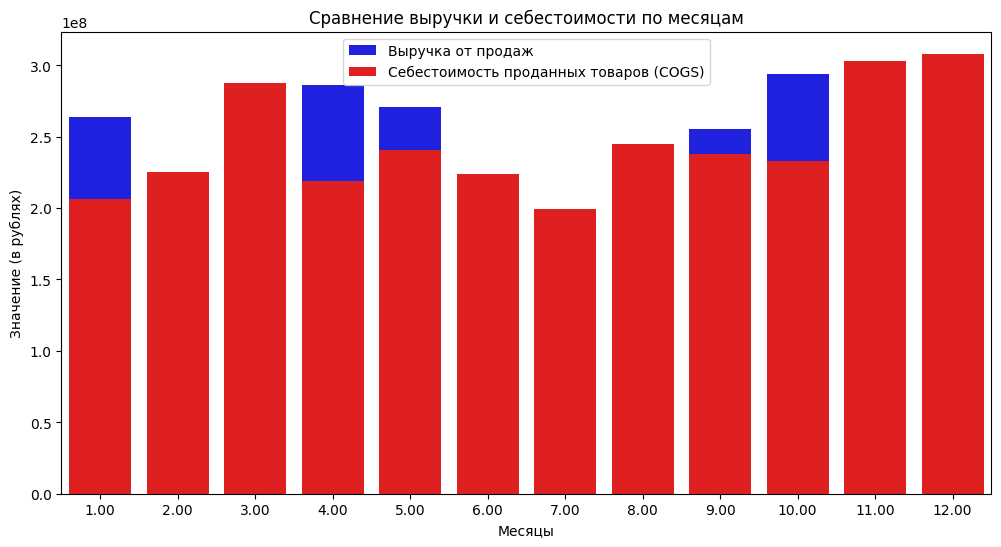

In [21]:
# Построим столбчатую диаграмму для сравнения выручки и себестоимости
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=monthly_pnl_df['Месяц'], y=monthly_pnl_df['Выручка от продаж'], color='b', label="Выручка от продаж")
sns.barplot(x=monthly_pnl_df['Месяц'], y=monthly_pnl_df['Себестоимость проданных товаров (COGS)'], color='r', label="Себестоимость проданных товаров (COGS)")

ax.set_xlabel('Месяцы')
ax.set_ylabel('Значение (в рублях)')
ax.legend()
plt.title("Сравнение выручки и себестоимости по месяцам")
plt.show()

In [33]:
import plotly.graph_objects as go # Диаграма водопад - накопительное формирование прибыли

fig = go.Figure(go.Waterfall(
    name = "2023",
    orientation = "v",
    x = df['Месяц'],
    measure = ["absolute"] + ["relative"]*(len(df.columns)-2) + ["total"],
    y = df.iloc[0,1:].values,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title = "Формирование прибыли (Waterfall Chart)",
    waterfallgap = 0.3,
    showlegend = True
)
fig.show()

# Отчет по маркетингу

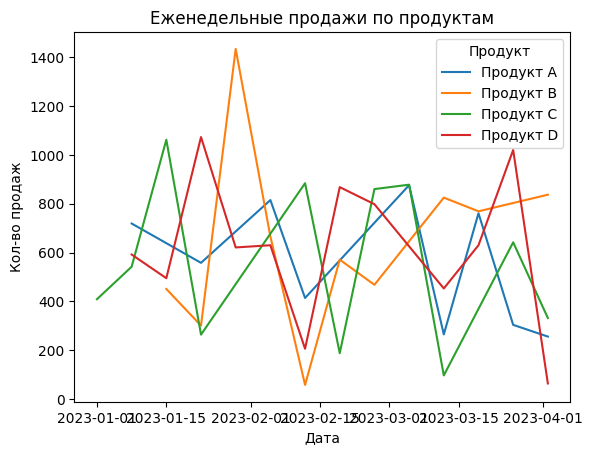

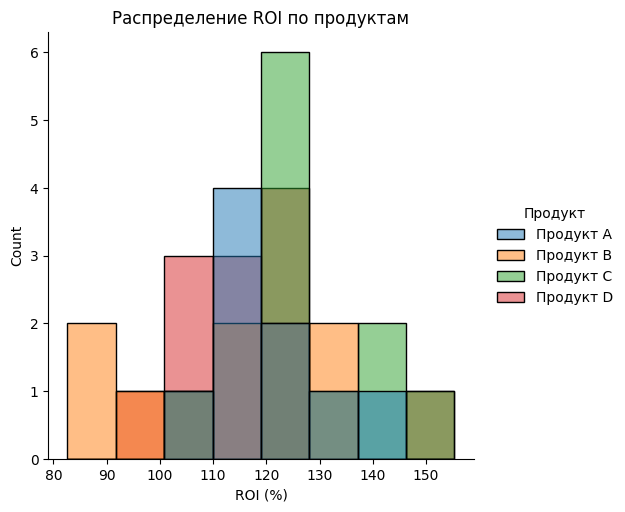

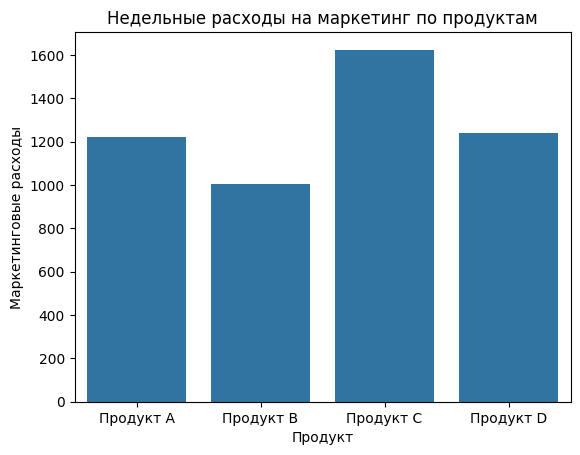

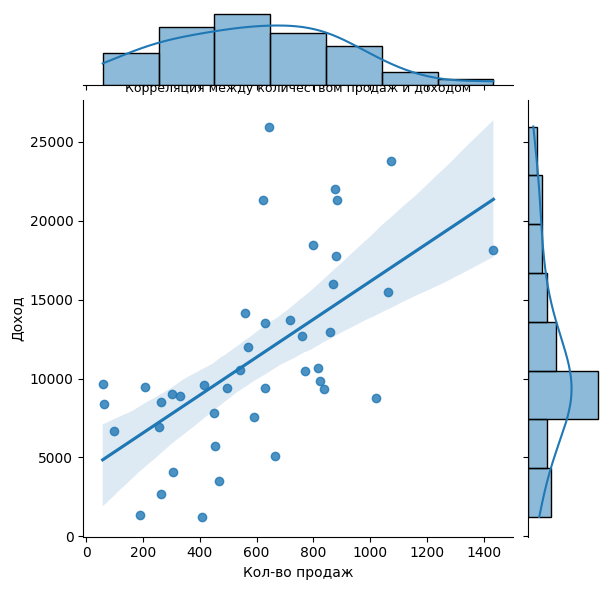

<ipython-input-47-a26eebfb1508>:72: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



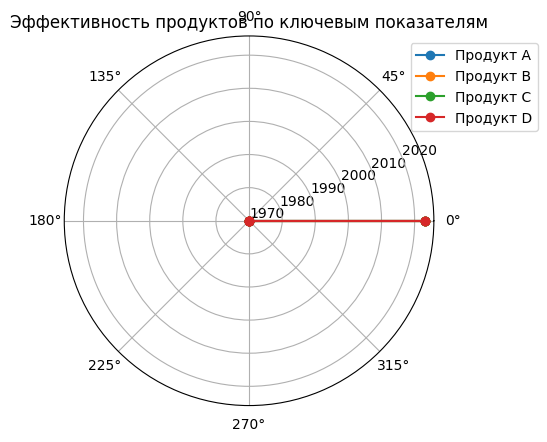

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация искусственных данных для маркетплейса Wildberries
np.random.seed(42)  # Для воспроизводимости результата

# Количество дней в анализе
days = 90

# Продукты
products = ['Продукт A', 'Продукт B', 'Продукт C', 'Продукт D']

# Датафрейм с синтетическими данными
df = pd.DataFrame({
    'Дата': pd.date_range(start='2023-01-01', periods=days),
    'Продукт': np.random.choice(products, size=days),
    'Кол-во продаж': np.random.randint(low=50, high=500, size=days),
    'Доход': np.random.uniform(low=1000, high=10000, size=days),
    'Маркетинговые расходы': np.random.uniform(low=100, high=1000, size=days),
    'ROI (%)': np.random.normal(loc=120, scale=20, size=days)
})

# Обработка данных
# Агрегирование данных по неделям
weekly_df = df.groupby(['Продукт', pd.Grouper(key='Дата', freq='W')]).agg({
    'Кол-во продаж': 'sum',
    'Доход': 'sum',
    'Маркетинговые расходы': 'sum',
    'ROI (%)': 'mean'
}).reset_index()

# Добавление общей суммы недельных продаж
weekly_df['Общая сумма продаж'] = weekly_df.groupby('Дата')['Кол-во продаж'].transform('sum')

# Вывод готового датафрейма
weekly_df.head()

# Визуализация данных

# 1. График еженедельных продаж по продуктам
sns.lineplot(data=weekly_df, x='Дата', y='Кол-во продаж', hue='Продукт')
plt.title('Еженедельные продажи по продуктам')
plt.show()

# 2. Гистограмма ROI по продуктам
sns.displot(data=weekly_df, x='ROI (%)', hue='Продукт', kind='hist')
plt.title('Распределение ROI по продуктам')
plt.show()

# 3. Полосовая диаграмма расходов на маркетинг
sns.barplot(data=weekly_df, x='Продукт', y='Маркетинговые расходы', errorbar=None)
plt.title('Недельные расходы на маркетинг по продуктам')
plt.show()

# 4. Корреляционный график между количеством продаж и доходом
sns.jointplot(data=weekly_df, x='Кол-во продаж', y='Доход', kind='reg')
plt.title('Корреляция между количеством продаж и доходом', fontsize=9)  # Уменьшение шрифта и увеличение отступа
plt.show()

# 5. Радарная диаграмма для оценки эффективности продуктов
radar_df = weekly_df.groupby('Продукт').mean().reset_index()
categories = radar_df.columns.drop('Продукт')

N = len(categories)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)

for idx, product in enumerate(radar_df['Продукт']):
    # Используем iloc для безопасного доступа к значениям
    values = radar_df.iloc[idx, 1:]  # Получаем значения без имени продукта
    values = np.concatenate((values, [values[0]]))  # Завершаем круг для полярной диаграммы
    angles = np.concatenate((theta, [theta[0]]))

    plt.polar(angles, values, 'o-', label=product)

plt.thetarange = theta * 180 / np.pi
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('Эффективность продуктов по ключевым показателям')
plt.show()

In [43]:
weekly_df.head(10) # Вывод отчета по данным

,Продукт,Дата,Кол-во продаж,Доход,Маркетинговые расходы,ROI (%),Общая сумма продаж
0,Продукт A,2023-01-08,719,13694.590999,1003.207920,115.208276,1853
1,Продукт A,2023-01-22,558,14127.163593,1153.426016,102.706549,2196
2,Продукт A,2023-02-05,815,10697.831441,1979.914901,124.782755,2111
3,Продукт A,2023-02-12,414,9577.941984,1295.300178,111.440978,1562
4,Продукт A,2023-03-05,876,22033.874651,2717.068002,110.877366,1754
5,Продукт A,2023-03-12,265,8517.722460,601.121136,112.293728,1640
6,Продукт A,2023-03-19,761,12706.916781,879.582118,139.812483,2160
7,Продукт A,2023-03-26,304,4069.597159,828.425040,127.140310,1966
8,Продукт A,2023-04-02,256,6939.856414,551.364665,132.592577,1489
9,Продукт B,2023-01-15,451,7799.960247,907.399234,82.654696,2008
